In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

# Summary

Every year hundreds of MLB players become free agents when their previous contracts run out, and they have to seek new teams.  The contracts they sign can vary wildly based on the player's skill, age, position, and more.  We will attempt to uncover some insights about what influences the size and length of free agent contracts signed by MLB players.

The dataset we will use is scraped from ESPN.com, and contains salary information for all free agent contracts from 2006-2019.  To see more about the web scraping process we used, explore the 'ESPN Web Scraper' notebook.

In [2]:
# read json into a pandas dataframe
players = pd.read_json('players.json')

# re-order columns
players = players[['year','name','pos','age','status','prev_team','new_team','dollars','years_signed']]

In [3]:
players.head()

,year,name,pos,age,status,prev_team,new_team,dollars,years_signed
0,2006,Moises Alou,LF,39,Signed (A),Giants,Mets,"$8,500,000",1
1,2006,Tony Armas,SP,28,Signed,Nationals,Pirates,"$3,500,000",1
2,2006,Rich Aurilia,1B,34,Signed (A),Reds,Giants,"$8,000,000",2
3,2006,Danys Baez,RP,28,Signed (A),Braves,Orioles,"$19,000,000",3
4,2006,Paul Bako,C,33,Signed,Royals,Orioles,"$900,000",1


# Analysis by Year

The data is sorted by the year in which each contract was signed.  We can explore this variable to see if there are significant trends across it, such as more/fewer players being signed in the past 5 years, or the average contract size and length increasing or decreasing.

First we clean the 'dollars' column by removing non-digit characters and casting from string to int.

In [4]:
if players['dollars'].dtype == 'object':
    players['dollars'] = players['dollars'].str.replace('$','').str.replace(',','').astype(int)

We can look at the number of contracts signed in each offseason with a simple bar chart.

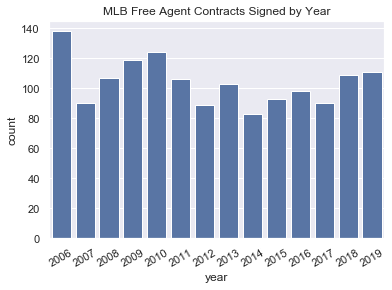

In [5]:
sns.countplot(x='year', data=players, color='b')

plt.title('MLB Free Agent Contracts Signed by Year')
plt.xticks(rotation=30)

plt.show()

We can generate a scatter plot which shows the size of each contract signed alongside the year.  The points for Alex Rodriguez and Bryce Harper's record-setting contracts are labeled.

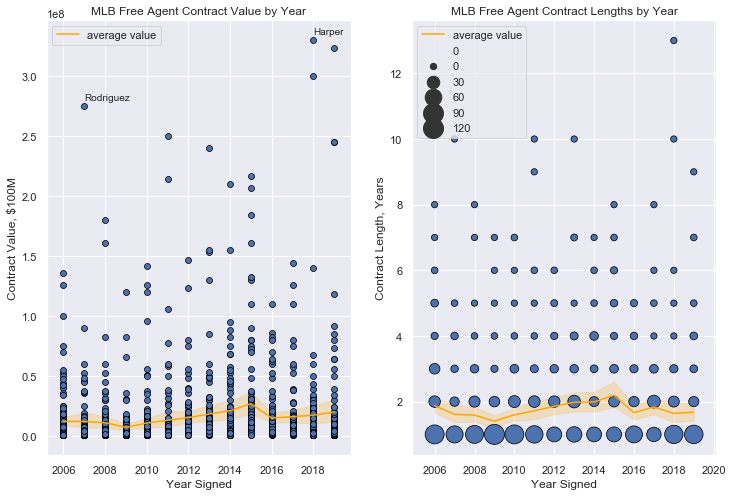

In [6]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# By Value of Contract
sns.lineplot(x='year',y='dollars', data=players, color='orange', label='average value', ax=ax1)
sns.scatterplot(x='year',y='dollars', data=players, edgecolor='black', ax=ax1)

ax1.legend(loc='upper left')
ax1.set_title('MLB Free Agent Contract Value by Year')
ax1.set_ylabel('Contract Value, $100M')
ax1.set_xlabel('Year Signed')
ax1.text(2007,280000000,'Rodriguez')
ax1.text(2018,335000000,'Harper')

# By Length of Contract
players_grouped_year = players.groupby(['year','years_signed']).size().reset_index()

sns.lineplot(x='year',y='years_signed', data=players, color='orange', label='average value', ax=ax2)
sns.scatterplot(x='year',y='years_signed', size=players_grouped_year[0], sizes=(40,400), data=players_grouped_year, edgecolor='black', ax=ax2)

ax2.legend(loc='upper left')
ax2.set_title('MLB Free Agent Contract Lengths by Year')
ax2.set_ylabel('Contract Length, Years')
ax2.set_xlabel('Year Signed')


#plt.savefig('figures/contracts_by_year.png', bbox_inches='tight')
plt.show()

# Analysis by Age

We can look at the most common ages of free agent players with a bar chart.  We see that the distribution is roughly a bell curve, with a peak around age 30-32, and the tails ranging from 21 to 45.

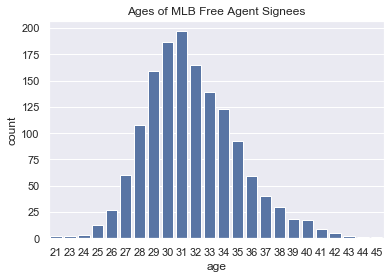

In [7]:
sns.countplot(x='age', data=players, color='b')

plt.title('Ages of MLB Free Agent Signees')
plt.show()

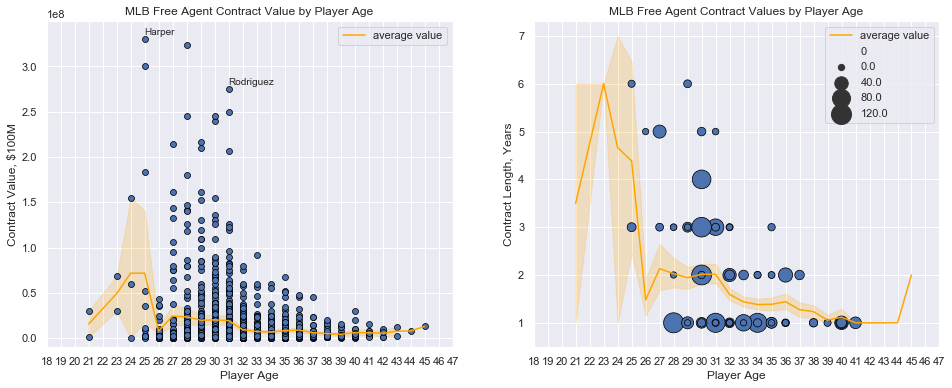

In [8]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

x_ticks = np.arange(30) + 18
y_ticks = 50000000 * np.arange(7)

# By Contract Value
sns.lineplot(x='age', y='dollars', data=players, color='orange', label='average value', ax=ax1)
sns.scatterplot(x='age', y='dollars', data=players, edgecolor='black', ax=ax1)

ax1.legend(loc='best')
ax1.set_xticks(x_ticks)
ax1.set_yticks(y_ticks)
ax1.set_ylim([-10000000,350000000])
ax1.set_title('MLB Free Agent Contract Value by Player Age')
ax1.set_ylabel('Contract Value, $100M')
ax1.set_xlabel('Player Age')
ax1.text(31,280000000,'Rodriguez')
ax1.text(25,335000000,'Harper')

# By Contract Length
players_grouped_age = players.groupby(['age','years_signed']).size().reset_index()

sns.lineplot(x='age', y='years_signed', data=players, color='orange', label='average value', ax=ax2)
sns.scatterplot(x='age', y='years_signed', data=players, size=players_grouped_age[0], sizes=(40,400), edgecolor='black', ax=ax2)
ax2.legend(loc='best')
ax2.set_xticks(x_ticks)
ax2.set_title('MLB Free Agent Contract Values by Player Age')
ax2.set_ylabel('Contract Length, Years')
ax2.set_xlabel('Player Age')


#plt.savefig('figures/contracts_by_age.png', bbox_inches='tight')
plt.show()

Looking at the age-distributed data, we see that very few players sign free agent contracts before age 27.  However, those that do tend to have higher average contract values than any other age group.  This makes some sense, as players do not usually sign free agent deals until they have accrued six years of MLB service time.  This means either the player joined the league very early (such as with Harper, who made his debut at 19), or they were signed from another international league, such as Japan or Cuba.  Players who fulfill either of these criteria are likely to be quite talented, and thus more valuable.

The age 26 season is a curious point, since it is noticeably lower than both 25 and 27, and there were no contracts given to 26-year olds for values greater than $50M.  While this could be a statistical anomaly, it could be the case that most players enter free agency for the first time around age 27-28, after starting their career ate 21-22 and accruing their size years of service time, while most international signees would have made their transition to the MLB earlier than age 26.

We also see that player value tends to drop off between the age 31 and 32 seasons.  Ages 25-30 is widely considered to be a player's "prime" in baseball, so this drop-off makes sense.

In [9]:
players[players['age'] < 25]

,year,name,pos,age,status,prev_team,new_team,dollars,years_signed
127,2006,Jerome Williams,RP,24,Signed,Athletics,Nationals,500000,1
356,2009,Aroldis Chapman,RP,21,Signed,Cuba,Reds,30250000,6
603,2011,Yu Darvish,SP,24,Signed,Japan,Rangers,60000000,6
862,2013,Masahiro Tanaka,SP,24,Signed,Japan,Yankees,155000000,7
952,2014,Yasmany Tomas,LF,23,Signed,Cuba,Diamondbacks,68500000,6
1036,2015,Yaisel Sierra,RP,23,Signed,Cuba,Dodgers,30000000,6
1109,2016,Thomas Milone,RF,21,Signed,Twins,Brewers,1250000,1


During this analysis we run across an error in the ESPN data in line 1109.  It seems that there are two Thomas Milones in the MLB, and the listing here confuses the two.  "Tommy" Milone (30 yr old starting pitcher) was the one who signed the contract listed here with the Brewers, while Thomas Milone (21 yr old right fielder) did not.  We will correct this row in the data to reflect the proper age and position of the signee.

In [10]:
players.iloc[1109, 2] = 'SP'
players.iloc[1109, 3] = 30
print(players.iloc[1109])

year                     2016
name            Thomas Milone
pos                        SP
age                        30
status                 Signed
prev_team               Twins
new_team              Brewers
dollars               1250000
years_signed                1
Name: 1109, dtype: object


# Analysis by Position

We have some minimal cleaning to do on the 'pos' column.  Namely, there are 3 rows where the position is set to 'P', and 5 where the position is set to 'OF'.  We want these to be set to more specific values, such as 'SP' or 'LF', so we will manually fix these.

In [11]:
# correct pitcher positions
players.loc[players['name']=='Adam Eaton', 'pos'] = 'SP'
players.loc[players['name']=='Andrew Bailey', 'pos'] = 'RP'
players.loc[players['name']=='Eddie Guardado', 'pos'] = 'RP'

# correct outfield positions
players.loc[players['name']=='Jose Cruz Jr.', 'pos'] = 'LF'
players.loc[players['name']=='So Taguchi', 'pos'] = 'LF'
players.loc[players['name']=='Fred Lewis', 'pos'] = 'LF'
players.loc[players['name']=='Carlos Beltran', 'pos'] = 'CF'

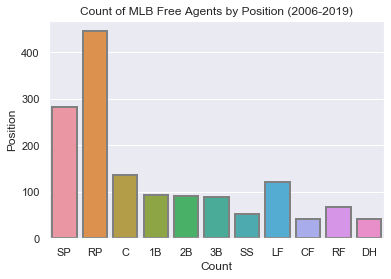

In [12]:
position_order = ['SP','RP','C','1B','2B','3B','SS','LF','CF','RF','DH']

sns.countplot(x='pos', order=position_order, linewidth=2, edgecolor='grey', data=players)
plt.title('Count of MLB Free Agents by Position (2006-2019)')
plt.ylabel('Position')
plt.xlabel('Count')

plt.show()

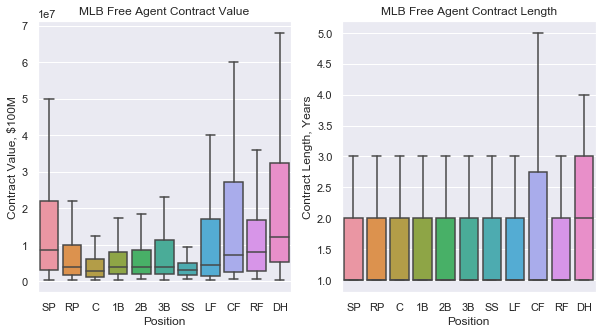

In [13]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(x='pos', y='dollars', data=players, order=position_order, ax=ax1, sym='')
ax1.set_title('MLB Free Agent Contract Value')
ax1.set_ylabel('Contract Value, $100M')
ax1.set_xlabel('Position')

sns.boxplot(x='pos', y='years_signed', data=players, order=position_order, sym='', ax=ax2)
ax2.set_title('MLB Free Agent Contract Length')
ax2.set_ylabel('Contract Length, Years')
ax2.set_xlabel('Position')

plt.show()

Curiously, the lowest-paying position seems to be Shortstop.  This is a bit unexpected because the previous chart reflected that shortstops were the least-signed position in free agency, potentially meaning they would demand a premium price.  A possible cause here is that shortstop is often the most athletic and physically demanding infield position, meaning teams might prefer to develop or trade for younger players than what is available in free agency.  A possible bias is that the ESPN data might mislabel some shortstops as Third Basemen or other positions, because many infielders can play in more than one spot, and it is difficult to reflect this with a single value for position.

### Average Age by Position

To investigate the proposition that shortstops are generally younger, we will calculate the average age of free agents in each position.

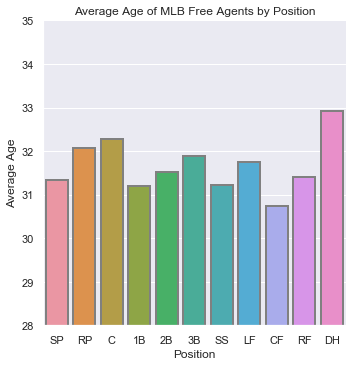

In [14]:
sns.catplot(x='pos', y='age', kind='bar', linewidth=2, edgecolor='grey', 
            order=position_order, ci=None, data=players).set(ylim=(28,35))
plt.title('Average Age of MLB Free Agents by Position')
plt.ylabel('Average Age')
plt.xlabel('Position')
plt.show()

We indeed see that Shortstop is the youngest infield position, and also notice that Centerfield, the least commonly signed outfield position, tends younger as well.  Designated Hitter, a role often used to carry veteran players who can still hit but are not talented fielders, is expectedly the oldest position on average.

# Analysis by Team

We can look at the contracts signed by each team, and see if certain teams have noticable strategies that surface from the data.

First, to prevent integer overflow we will cast the 'dollars' column from int32 to int64.

In [134]:
players['dollars'] = players['dollars'].astype('int64')

We created a web scraper to get all the team color codes, which can be seen in the 'Color Codes Scraper' notebook.  We will now load that data into a pandas dataframe to format our visualization palettes.

In [135]:
team_colors = pd.read_json('team_colors.json')
team_colors = team_colors.sort_values('name')
team_colors.head()

,name,primary_color,secondary_color
12,Angels,#BA0021,#003263
10,Astros,#002D62,#EB6E1F
19,Athletics,#003831,#EFB21E
28,Blue Jays,#134A8E,#E8291C
1,Braves,#002855,#BA0C2F


In [142]:
primary_colors = team_colors['primary_color'].values
secondary_colors = team_colors['secondary_color'].values

print(len(primary_colors))
print(len(secondary_colors))
print(len(players['new_team'].unique()))

31
31
31


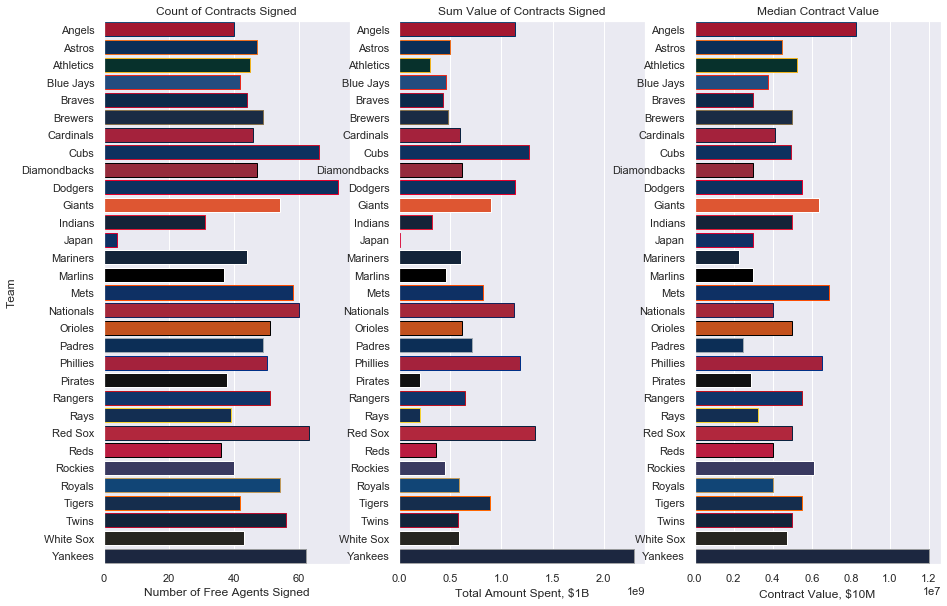

In [146]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

order_teams = sorted(players['new_team'].unique())

# Count
sns.countplot(y='new_team', data=players, palette=primary_colors, edgecolor=secondary_colors, order=order_teams, ax=ax1)
ax1.set_title('Count of Contracts Signed')
ax1.set_ylabel('Team')
ax1.set_xlabel('Number of Free Agents Signed')

# Sum
sns.barplot(y='new_team', x='dollars', estimator=np.sum, data=players, palette=primary_colors, edgecolor=secondary_colors,
            order=order_teams, ci=None, ax=ax2)
ax2.set_title('Sum Value of Contracts Signed')
ax2.set_ylabel('')
ax2.set_xlabel('Total Amount Spent, $1B')

sns.barplot(y='new_team', x='dollars', estimator=np.median, data=players, palette=primary_colors, edgecolor=secondary_colors, 
            order=order_teams, ci=None, ax=ax3)
ax3.set_title('Median Contract Value')
ax3.set_ylabel('')
ax3.set_xlabel('Contract Value, $10M')

plt.show()

### Biggest Contracts by Team

Here we will look for the largest contract (in total dollar value) offered by each team.

In [88]:
biggest_contracts = players.loc[players.groupby('new_team').dollars.agg('idxmax')].reset_index()

biggest_contracts[['year','new_team','name','age','dollars','years_signed']]

,year,new_team,name,age,dollars,years_signed
0,2011,Angels,Albert Pujols,31,250000000,10
1,2006,Astros,Carlos Lee,29,100000000,6
2,2014,Athletics,Billy Butler,28,30000000,3
3,2014,Blue Jays,Russell Martin,31,82000000,5
4,2012,Braves,B.J. Upton,27,75250000,5
5,2017,Brewers,Lorenzo Cain,31,80000000,5
6,2009,Cardinals,Matt Holliday,29,120000000,7
7,2015,Cubs,Jason Heyward,25,184000000,8
8,2015,Diamondbacks,Zack Greinke,31,206500000,6
9,2012,Dodgers,Zack Greinke,28,147000000,6


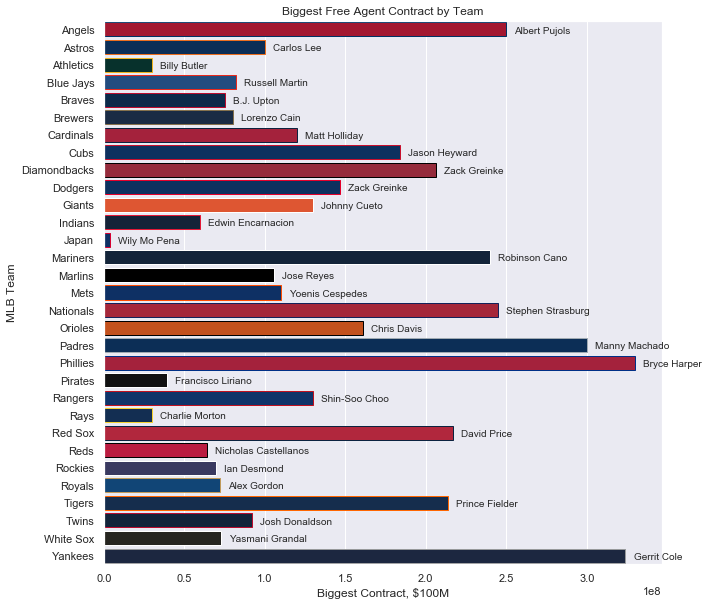

In [160]:
fig = plt.figure(figsize=(10,10)) 
ax1 = fig.add_subplot(1,1,1)

sns.barplot(x='dollars', y='new_team', data=biggest_contracts, color='b', palette=primary_colors, edgecolor=secondary_colors,
            order=order_teams, ax=ax1)
plt.title('Biggest Free Agent Contract by Team')
plt.ylabel('MLB Team')
plt.xlabel('Biggest Contract, $100M')


for index, row in biggest_contracts.iterrows():
    ax1.text(row['dollars'] + 5000000, index+0.2, row['name'])

plt.show()